In [24]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from numpy.linalg import inv
import statsmodels.api as sm
import pandas as pd
import re
from sklearn.linear_model import LinearRegression

In [25]:
df = pd.read_csv('/Users/tiziana/Desktop/PYTHON/TESI MAGISTRALE/PCA/DATESET.csv')
df=df.iloc[:, 1:]
df.head()
df.set_index(['Country'],inplace=True)
fin = pd.DataFrame(df.loc['France'])



fin.reset_index(inplace=True)
fin=fin.drop(['Country','Trimestre'],axis=1)

In [26]:
dftest = adfuller(fin['Gdp growth'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print(f'Gdp growth is Stationary ')
else:
    print('Non stationary')



dftest = adfuller(fin['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(fin['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(fin['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print(f'Financial Index Non stationary')

Gdp growth is Stationary 
Current Account Non stationary
Public Debt Non stationary
Financial Index Non stationary


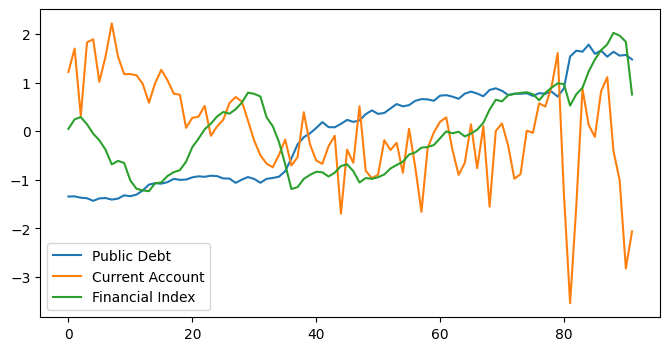

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 4))
plt.plot(fin['Public Debt'], label='Public Debt')
plt.plot(fin['Current Account'], label='Current Account')
plt.plot(fin['Financial index'], label='Financial Index')


plt.legend()
plt.show()

In [28]:
from statsmodels.tsa.api import VAR
model = VAR(fin)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()


,AIC,BIC,FPE,HQIC
0,-2.328,-2.212,0.09752,-2.281
1,-10.62,-10.04*,2.448e-05,-10.39
2,-10.85,-9.807,1.949e-05,-10.43
3,-11.15,-9.642,1.456e-05,-10.54*
4,-11.02,-9.054,1.671e-05,-10.23
5,-11.44*,-9.006,1.127e-05*,-10.46
6,-11.41,-8.514,1.197e-05,-10.24
7,-11.34,-7.984,1.336e-05,-9.992
8,-11.33,-7.510,1.436e-05,-9.794


In [29]:
fin_coin = fin.drop('Gdp growth',axis=1)
fin_coin

,Current Account,Public Debt,Financial index
0,1.218509,-1.343554,0.047552
1,1.698813,-1.340340,0.243404
2,0.311611,-1.368065,0.289704
3,1.826291,-1.379122,0.142800
4,1.889152,-1.432830,-0.050964
...,...,...,...
87,1.111286,1.532620,1.785667
88,-0.405685,1.633607,2.021425
89,-1.009115,1.554026,1.965352
90,-2.823163,1.568189,1.839355


In [30]:
fin_coin = fin.drop('Gdp growth',axis=1)

from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
test = coint_johansen(fin_coin, det_order=1, k_ar_diff=4)

output = pd.DataFrame([test.lr1],  index=["trace_stat"], columns=['r=0', 'r<=1', 'r<=2'])
print(output.T, '\n')

cvt = pd.DataFrame(test.cvt, index=["r=0", "r<=1", "r<=2"], columns=["90%", "95%", "99%"])
print("Critical values(90%, 95%, 99%) of trace_stat\n", cvt, '\n')

print("Eigenvalues (lambda):\n")
print(test.eig, "\n")

print("Eigenvectors:")
evec = pd.DataFrame(test.evec).T
print(evec)


      trace_stat
r=0    47.615482
r<=1   14.836178
r<=2    4.830708 

Critical values(90%, 95%, 99%) of trace_stat
           90%      95%      99%
r=0   32.0645  35.0116  41.0815
r<=1  16.1619  18.3985  23.1485
r<=2   2.7055   3.8415   6.6349 

Eigenvalues (lambda):

[0.31392862 0.10863868 0.05401198] 

Eigenvectors:
          0         1         2
0  1.695023 -4.815322 -2.242008
1 -1.633000 -3.025834 -0.703571
2  0.070561  3.083501 -0.980494


In [31]:
fin['Gdp growth']=fin['Gdp growth']
fin['Current Account'] = fin['Current Account'].diff(1)
fin['Public Debt'] = fin['Public Debt'].diff(1)
fin['Financial index'] = fin['Financial index'].diff(1)

fin=fin.iloc[1:]

In [32]:
dftest = adfuller(fin['Current Account'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Current Account is Stationary')
else:
    print('Current Account Non stationary')


dftest = adfuller(fin['Public Debt'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Public Debt is Stationary')
else:
    print('Public Debt Non stationary')



dftest = adfuller(fin['Financial index'], autolag="AIC")
dfoutput = pd.Series(
dftest[0:4],
index=[
"Test Statistic",
"p-value",
"#Lags Used",
"Number of Observations Used",
],
)
if dftest[1] < 0.05:
    print('Financial Index is Stationary')
else:
    print('Financial Index Non stationary')


Current Account is Stationary
Public Debt is Stationary
Financial Index is Stationary


In [33]:
from statsmodels.tsa.api import VAR
model = VAR(fin)
lag_order = model.select_order(maxlags=8)  
lag_order.summary()

,AIC,BIC,FPE,HQIC
0,-9.579,-9.462,6.918e-05,-9.532
1,-10.68,-10.10*,2.299e-05,-10.45
2,-10.79,-9.737,2.075e-05,-10.36
3,-11.03,-9.515,1.638e-05,-10.42
4,-11.40*,-9.416,1.149e-05*,-10.60*
5,-11.25,-8.803,1.359e-05,-10.27
6,-11.09,-8.181,1.641e-05,-9.924
7,-11.18,-7.798,1.579e-05,-9.821
8,-11.32,-7.474,1.459e-05,-9.775


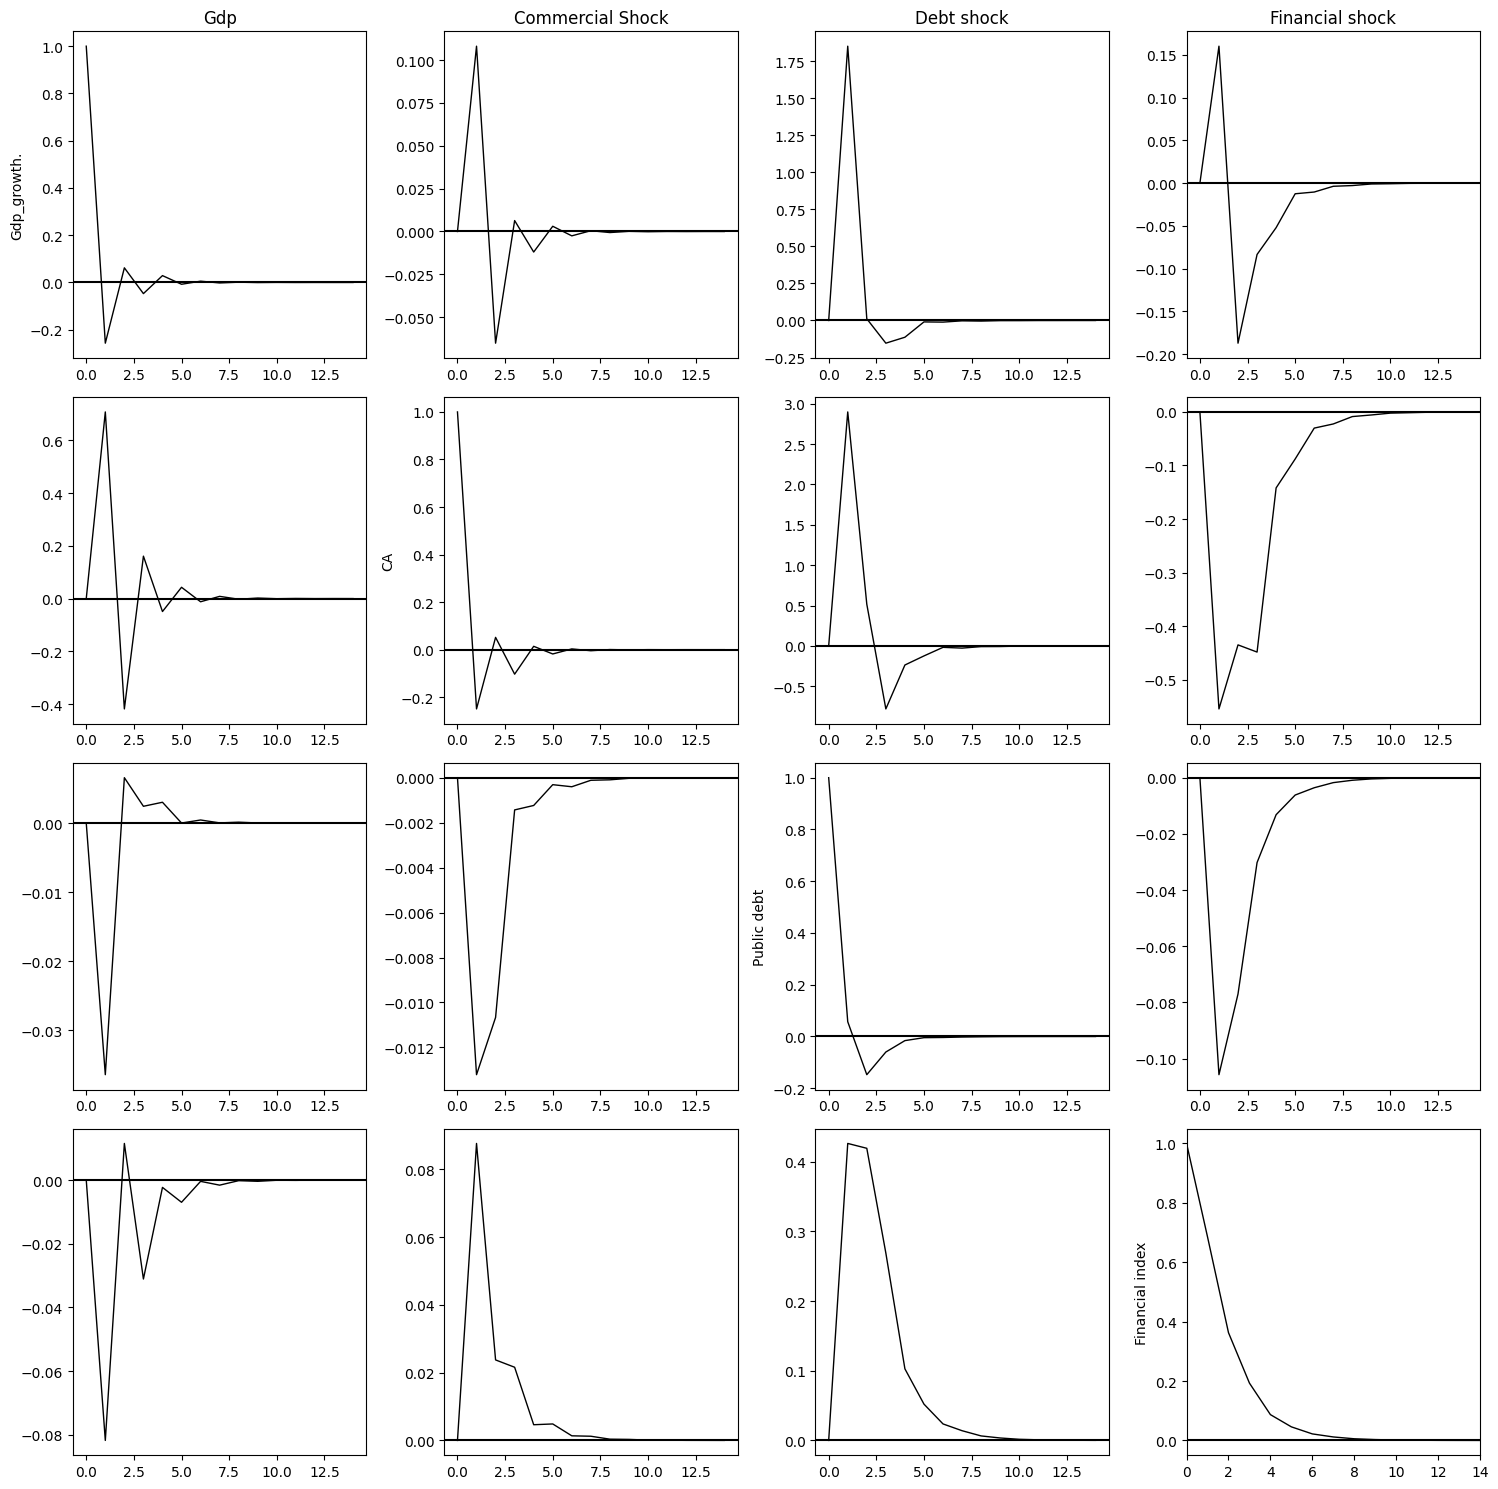

In [49]:
m = 4  #Considered Variable
p = 3 #Number of lags based on AIC criterion
c = 1  #Constant term
h = 15 #IRF horizon

T = len(fin)
Y = fin.iloc[p:, :] #Building a VAR(5) is not possible to consider first 5 observations

X_lagged  = pd.DataFrame()
for col in fin.columns:
    for i in range(1, p+1):
        X_lagged[f'{col}_lag_{i}'] = fin[col].shift(i)
X_lagged = X_lagged.iloc[p:,:]
X_lagged = X_lagged[[col for lag in sorted(set(int(re.search(r'_lag_(\d+)$', col).group(1)) 
                                               if re.search(r'_lag_(\d+)$', col) else 0 for col in X_lagged.columns)) 
                                               for col in [x for x in X_lagged.columns if re.search(fr'_lag_{lag}$', x)]] + 
                                               [x for x in X_lagged.columns if not re.search(r'_lag_\d+$', x)]]
X_lagged.insert(0, 'const', 1)

pi_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_lagged.T, X_lagged)), X_lagged.T), Y) 
Y_fit = np.dot(X_lagged, pi_hat)
err = Y - Y_fit

A_comp = np.block([
[pi_hat[1:, :].T],
[np.eye(m * p - m), np.zeros((m * p - m, m))]
])


PHI = np.zeros((m, m, h))
for j in range(h):
    PHI_comp = np.linalg.matrix_power(A_comp, j)
    PHI[:, :, j] = PHI_comp[:m, :m]



PHI_plot = np.reshape(np.transpose(PHI, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp_growth.', 'CA', 'Public debt','Financial index']
Shocknames = ['Gdp', 'Commercial Shock', 'Debt shock','Financial shock']

ylab = 0

fig, axes = plt.subplots(m, m, figsize=(15, 15))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
    if k < 4: 
        ax.set_title(Shocknames[k]) 
    if k in [0, 5, 10,15]: 
        ax.set_ylabel(VARnames[ylab]) 
        ylab += 1
ax.set_xlim([0, h-1])
plt.tight_layout() 
plt.show()

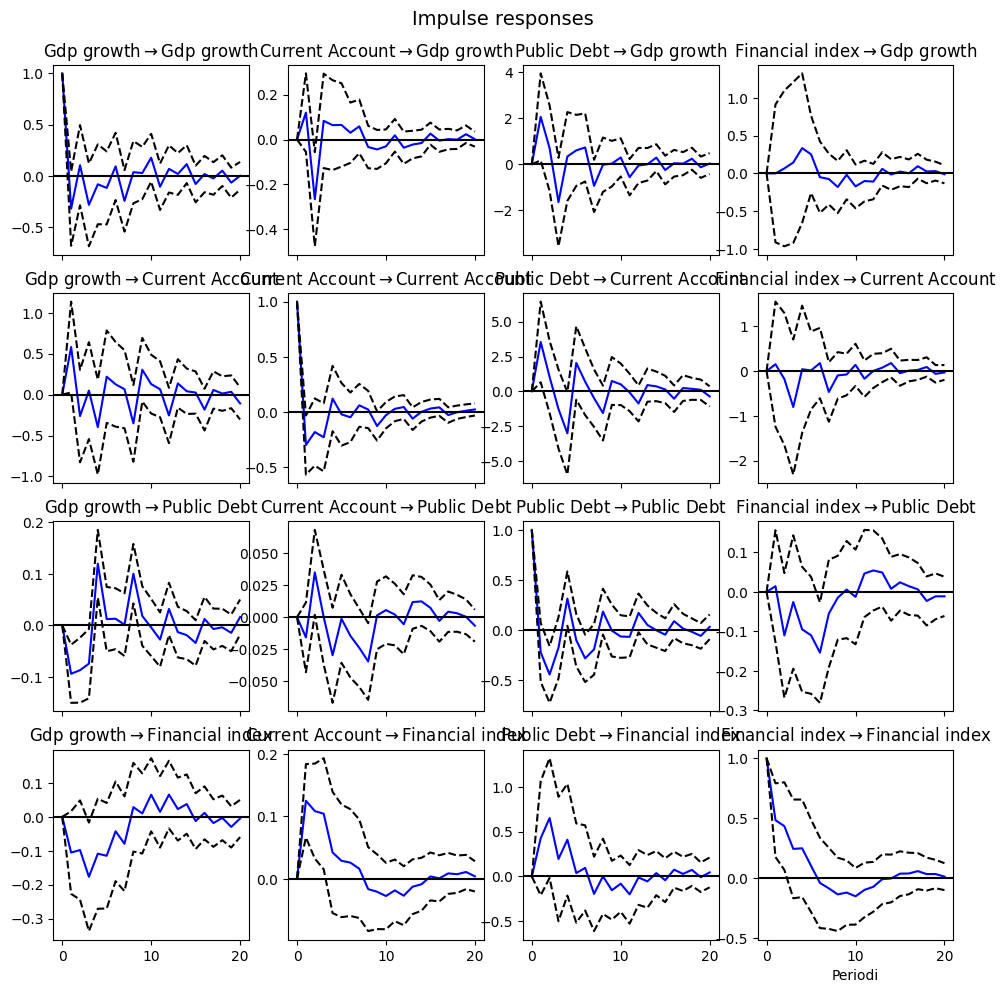

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 10 is zero: fail to reject at 5% significance level. Test statistic: 113.137, critical value: 119.871>, p-value: 0.112>


In [53]:
model = sm.tsa.VAR(fin)

# Stima il modello con un ordine di 6
results = model.fit(4)
irf = results.irf(20)

irf.plot(orth=False)
plt.xlabel('Periodi')

plt.show()

whiteness_test_result = results.test_whiteness(nlags=10)
print(whiteness_test_result)

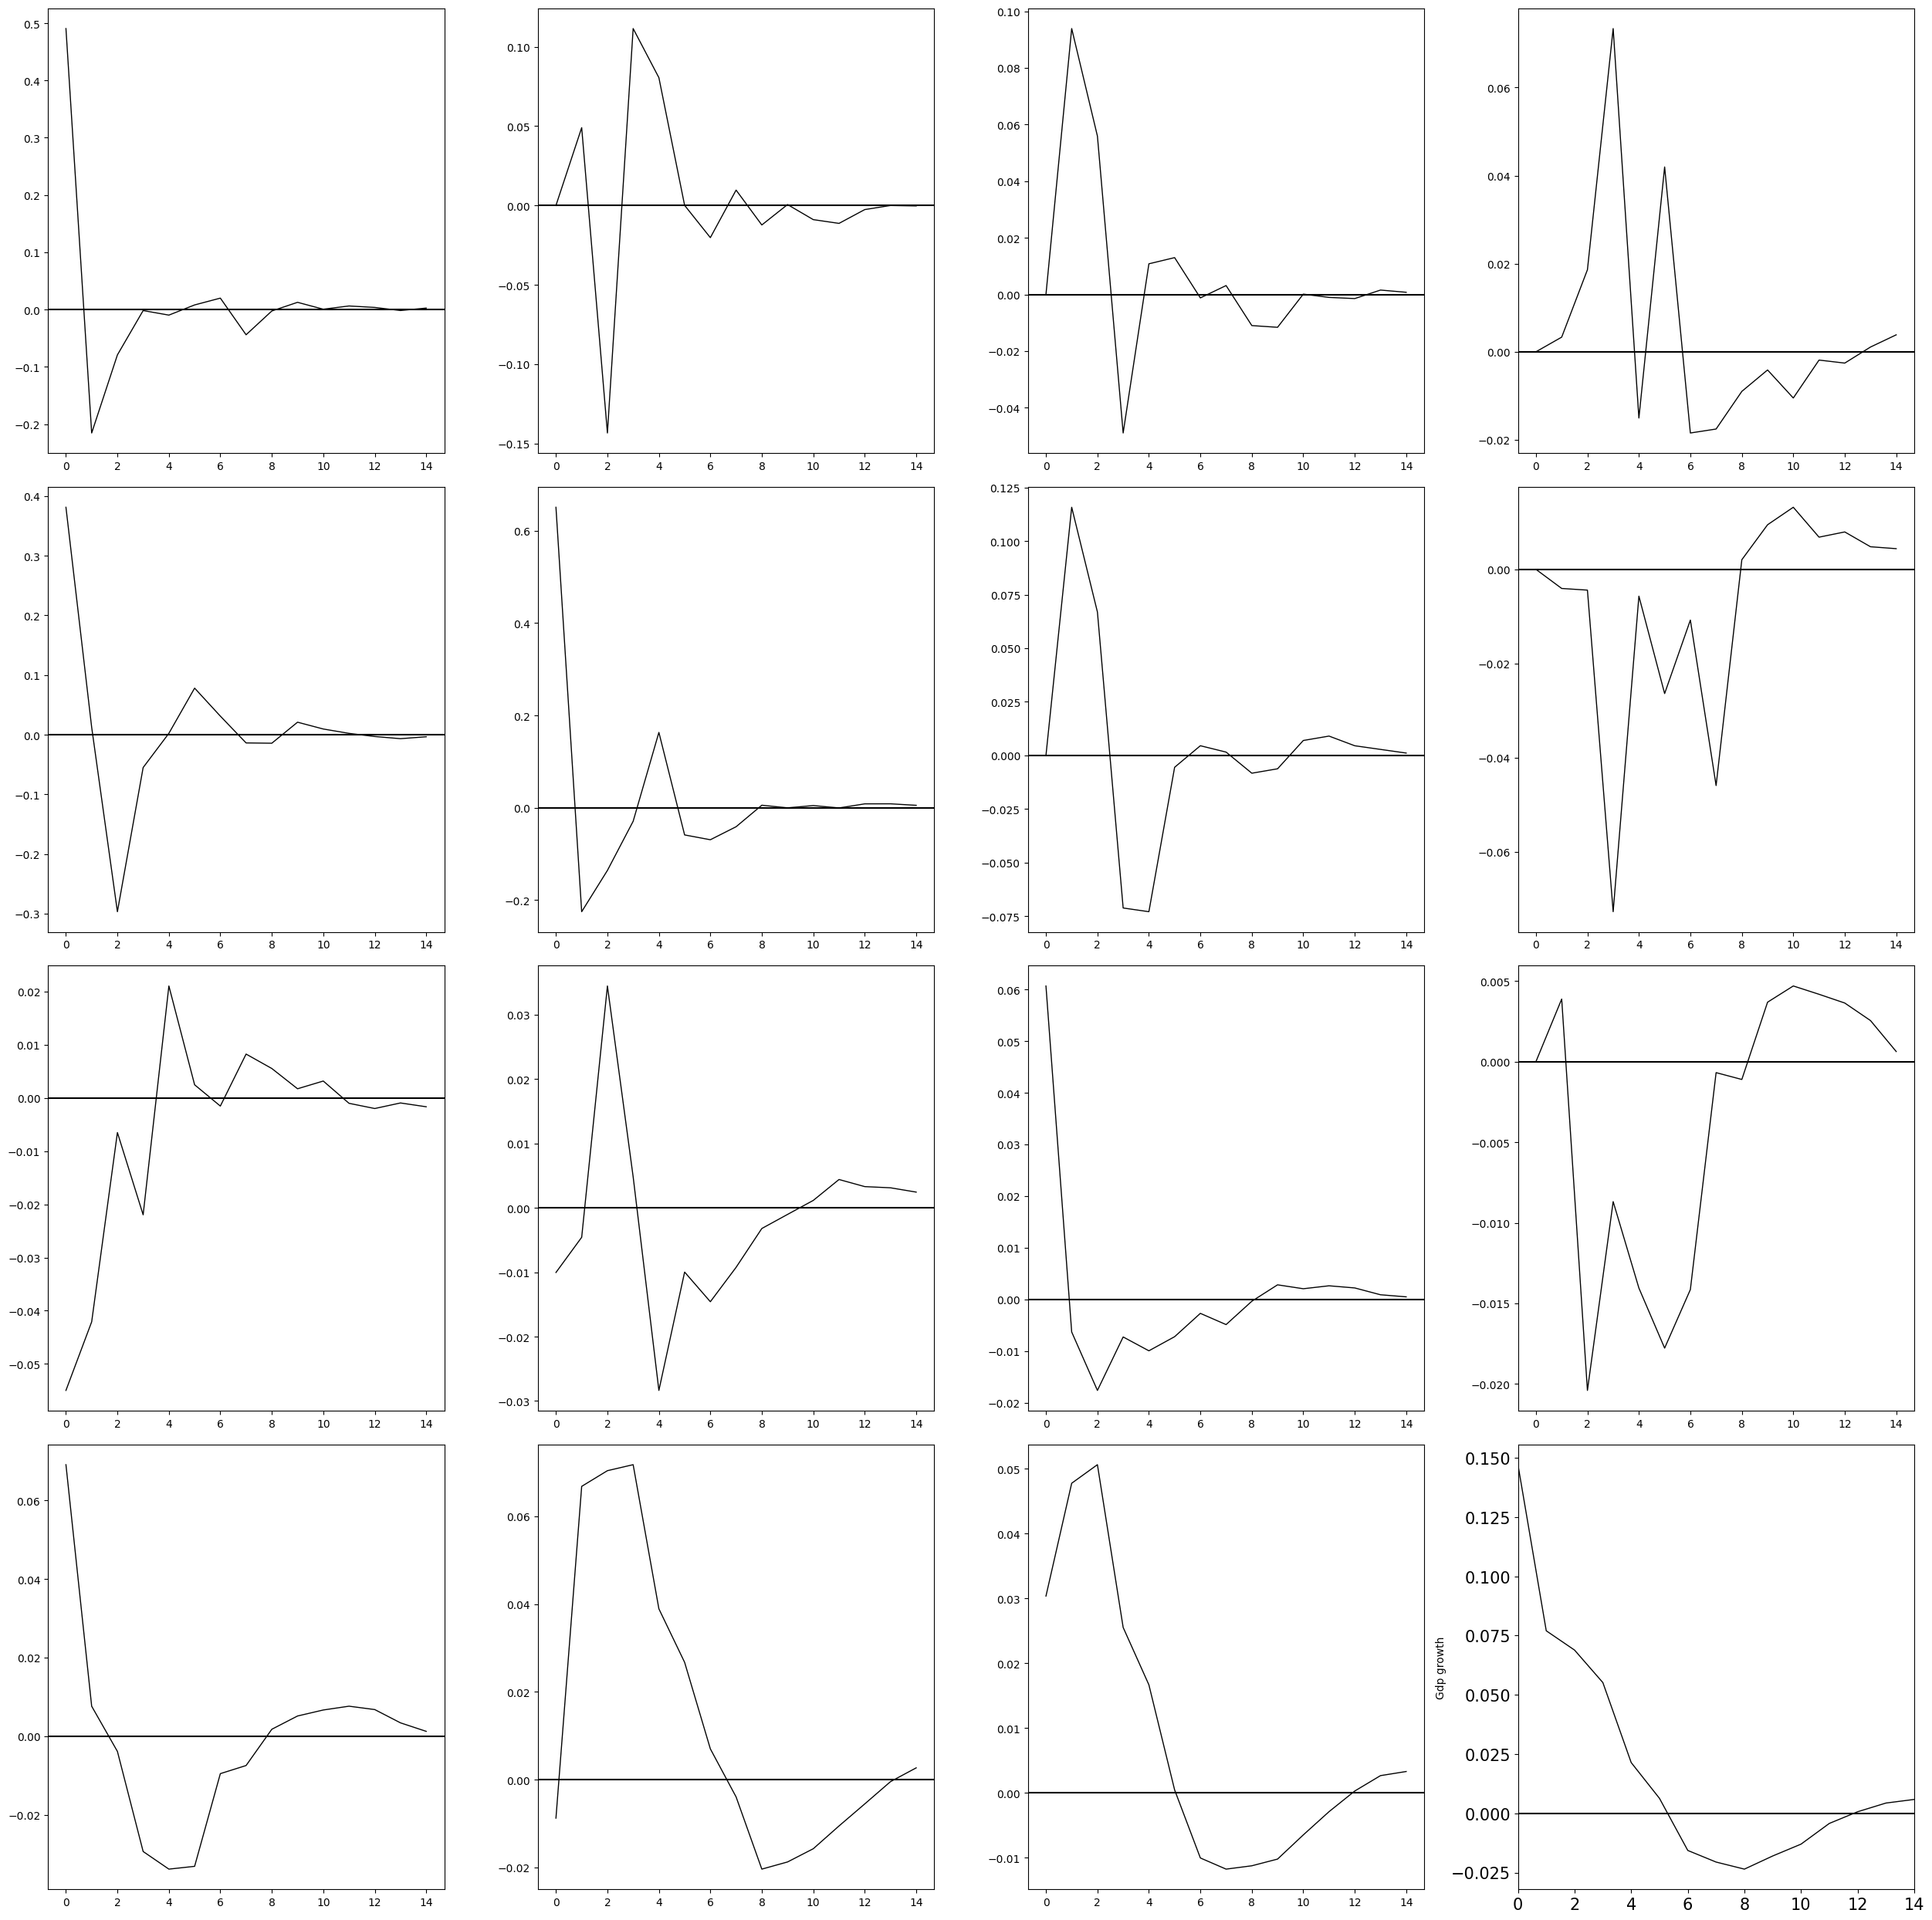

In [36]:


T = len(fin) - m * p - m

omega = np.dot(err.T, err) / T

P = np.linalg.cholesky(omega)
PHI_SR = np.zeros((m, m, h))

for i in range(h):
    PHI_SR[:, :, i] = np.dot(PHI[:, :, i], P)
    
PHI_SR_plot = np.reshape(np.transpose(PHI_SR, (2, 0, 1)), (h, m*m))

VARnames = ['Gdp growth', 'Current Account', 'Public Debt','Financil index'] 
Shocknames = ['Gdp shock', 'Commercial shock', 'Debt shock','Financial shock']
ylab = 0
# Create subplots
fig, axes = plt.subplots(m, m, figsize=(25, 25))
axes_flat = axes.flatten()
for k in range(m*m): 
    ax = axes_flat[k]
    ax.plot(np.arange(h), PHI_SR_plot[:, k], linewidth=1, color='k')
    ax.axhline(0, color='k', linestyle='-')
if k < 4: 
    ax.set_title(Shocknames[k]) 
if k in [0, 5, 10, 15]: 
    ax.set_ylabel(VARnames[ylab]) 
    ylab += 1

ax.set_xlim([0, h-1]) 
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout() 
plt.show()

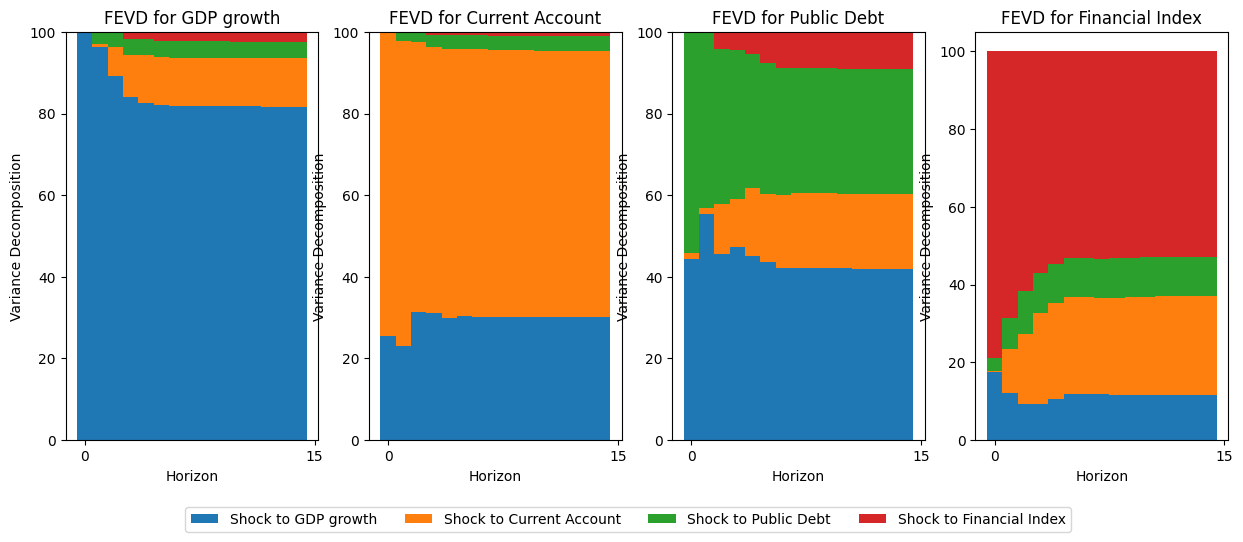

In [37]:
h = 15
MSE = np.zeros((m, m, h))
MSE_shock = np.zeros((m, m, h))
FEVD = np.zeros((h, m, m))

MSE[:, :, 0] = omega
for ii in range(m):
    for nn in range(1, h):
        MSE[:, :, nn] = MSE[:, :, nn - 1] + PHI[:, :, nn] @ omega @ PHI[:, :, nn].T
    MSE_shock[:, :, 0] = P[:, ii].reshape(-1, 1) @ P[:, ii].reshape(1, -1)

    for nn in range(1, h):
        MSE_shock[:, :, nn] = MSE_shock[:, :, nn - 1] + PHI[:, :, nn] @ MSE_shock[:, :, 0] @ PHI[:, :, nn].T
    FECD = MSE_shock[:, :, :] / MSE[:, :, :]

    for nn in range(h):
        for kk in range(m):
            FEVD[nn, ii, kk] = 100 * FECD[kk, kk, nn]

def plot_FEVD(FEVD_result, variable_names, horizon=40):
    """
    Plot FEVD results using stacked bar plots in subplots.
    FEVD_result: The FEVD matrix of shape (n, n, horizon)
    variable_names: List of names of the variables
    horizon: The number of periods ahead for the forecast
    """
    FEVD_result = FEVD_result.transpose((2, 1, 0))
    n = FEVD_result.shape[0]
    cols = 4
    rows = int(np.ceil(n / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.subplots_adjust(bottom=0.2, hspace=0.4)

    if rows == 1:
        axes = axes.flatten()
    for i in range(n):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        bottom_values = np.zeros(horizon)
        for j in range(n):
            ax.bar(np.arange(horizon), FEVD_result[i, j, :], bottom=bottom_values, width=1, label=f"Shock to {variable_names[j]}")
            bottom_values += FEVD_result[i, j, :]
        ax.set_title(f"FEVD for {variable_names[i]}")
        ax.set_xlabel("Horizon")
        ax.set_ylabel("Variance Decomposition")
        ax.set_xticks(np.linspace(0, horizon, int(horizon / 10) + 1, endpoint=True))

    for i in range(n, rows * cols):
        ax = axes[i // cols, i % cols] if rows > 1 else axes[i]
        ax.axis('off')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.1), ncol=len(variable_names))

variable_names = ['GDP growth', 'Current Account', 'Public Debt', 'Financial Index']
plot_FEVD(FEVD, variable_names, h)


In [38]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(fin[['Current Account', 'Financial index']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0913  , p=0.7632  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.0945  , p=0.7586  , df=1
likelihood ratio test: chi2=0.0944  , p=0.7586  , df=1
parameter F test:         F=0.0913  , p=0.7632  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.6379  , p=0.2005  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=3.4708  , p=0.1763  , df=2
likelihood ratio test: chi2=3.4048  , p=0.1822  , df=2
parameter F test:         F=1.6379  , p=0.2005  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6138  , p=0.1926  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=5.2597  , p=0.1537  , df=3
likelihood ratio test: chi2=5.1086  , p=0.1640  , df=3
parameter F test:         F=1.6138  , p=0.1926  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.09131373184068406, 0.763234840783456, 87.0, 1),
   'ssr_chi2test': (0.09446248121450075, 0.7585788899575934, 1),
   'lrtest': (0.09441294276152234, 0.7586402340708379, 1),
   'params_ftest': (0.09131373184066993, 0.7632348407834681, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.6379095689474499, 0.20053251572274217, 84.0, 2),
   'ssr_chi2test': (3.4708083722934058, 0.17632891617610402, 2),
   'lrtest': (3.404840943478632, 0.18224187845649034, 2),
   'params_ftest': (1.6379095689474552, 0.20053251572273986, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.613785447796913, 0.19259396696506798, 81.0, 3),
   'ssr_chi2test': (5.2597451631899395, 0.15373589753641476, 3),
   'lrtest': (5.108553503402277, 0.1640187260073859, 3),
   'params_ftest': (1.613785447796903, 0.19259396696507156, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [39]:
grangercausalitytests(fin[['Public Debt', 'Financial index']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.8423  , p=0.0304  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=5.0093  , p=0.0252  , df=1
likelihood ratio test: chi2=4.8749  , p=0.0273  , df=1
parameter F test:         F=4.8423  , p=0.0304  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.7264  , p=0.0281  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=7.8964  , p=0.0193  , df=2
likelihood ratio test: chi2=7.5655  , p=0.0228  , df=2
parameter F test:         F=3.7264  , p=0.0281  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.0095  , p=0.0349  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=9.8088  , p=0.0203  , df=3
likelihood ratio test: chi2=9.2997  , p=0.0256  , df=3
parameter F test:         F=3.0095  , p=0.0349  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (4.842334588381189, 0.0304183299828723, 87.0, 1),
   'ssr_chi2test': (5.009311643152954, 0.025211330023627212, 1),
   'lrtest': (4.874871038691708, 0.027250477025858776, 1),
   'params_ftest': (4.84233458838121, 0.03041832998287212, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.7263784875650283, 0.028149086915094504, 84.0, 2),
   'ssr_chi2test': (7.896373461744941, 0.01928964740501676, 2),
   'lrtest': (7.565509337106619, 0.022759908986827043, 2),
   'params_ftest': (3.726378487565025, 0.028149086915094504, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.0095317678605555, 0.03491954153210584, 81.0, 3),
   'ssr_chi2test': (9.808844280434403, 0.02026291033411657, 3),
   'lrtest': (9.299680789439947, 0.02556074166667538, 3),
   'params_ftest': (3.0095317678605653, 0.03491954153210523, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [40]:
grangercausalitytests(fin[['Gdp growth', 'Financial index']], 3)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0012  , p=0.9723  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.0013  , p=0.9718  , df=1
likelihood ratio test: chi2=0.0013  , p=0.9718  , df=1
parameter F test:         F=0.0012  , p=0.9723  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5175  , p=0.5979  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=1.0966  , p=0.5779  , df=2
likelihood ratio test: chi2=1.0899  , p=0.5799  , df=2
parameter F test:         F=0.5175  , p=0.5979  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5974  , p=0.6185  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=1.9471  , p=0.5835  , df=3
likelihood ratio test: chi2=1.9259  , p=0.5879  , df=3
parameter F test:         F=0.5974  , p=0.6185  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.0012103909718940886, 0.9723263563860362, 87.0, 1),
   'ssr_chi2test': (0.0012521285916145743, 0.9717724033411032, 1),
   'lrtest': (0.0012521198815420576, 0.9717725014788834, 1),
   'params_ftest': (0.0012103909718892507, 0.9723263563860362, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.5175122418140404, 0.5978891727502937, 84.0, 2),
   'ssr_chi2test': (1.0966330838440381, 0.577921899205176, 2),
   'lrtest': (1.0899318717382016, 0.5798615354826727, 2),
   'params_ftest': (0.5175122418140414, 0.5978891727502937, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.5974152533145718, 0.6185163291152467, 81.0, 3),
   'ssr_chi2test': (1.947131195988234, 0.583452006451531, 3),
   'lrtest': (1.9259021840160244, 0.5879274965758858, 3),
   'params_ftest': (0.597415253314558, 0.6185163291152548, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [41]:
grangercausalitytests(fin[['Financial index', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3498  , p=0.0231  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=5.5342  , p=0.0186  , df=1
likelihood ratio test: chi2=5.3707  , p=0.0205  , df=1
parameter F test:         F=5.3498  , p=0.0231  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3838  , p=0.0386  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=7.1705  , p=0.0277  , df=2
likelihood ratio test: chi2=6.8963  , p=0.0318  , df=2
parameter F test:         F=3.3838  , p=0.0386  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4040  , p=0.0735  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=7.8354  , p=0.0495  , df=3
likelihood ratio test: chi2=7.5060  , p=0.0574  , df=3
parameter F test:         F=2.4040  , p=0.0735  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (5.34975297331029, 0.02308477484258129, 87.0, 1),
   'ssr_chi2test': (5.534227213769265, 0.018647999208805686, 1),
   'lrtest': (5.370742178154899, 0.020477262810152472, 1),
   'params_ftest': (5.349752973310272, 0.023084774842581417, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.3838401425407296, 0.03860273558421304, 84.0, 2),
   'ssr_chi2test': (7.170518397288689, 0.027729479255180864, 2),
   'lrtest': (6.896296666950036, 0.03180447316650827, 2),
   'params_ftest': (3.3838401425407367, 0.03860273558421265, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.404036232348599, 0.0734751531649552, 81.0, 3),
   'ssr_chi2test': (7.835377349876915, 0.04953934590802601, 3),
   'lrtest': (7.50596754440835, 0.057405318327931346, 3),
   'params_ftest': (2.4040362323485946, 0.07347515316495531, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0

In [42]:
grangercausalitytests(fin[['Public Debt', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.6925  , p=0.1044  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=2.7853  , p=0.0951  , df=1
likelihood ratio test: chi2=2.7431  , p=0.0977  , df=1
parameter F test:         F=2.6925  , p=0.1044  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1827  , p=0.1191  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=4.6252  , p=0.0990  , df=2
likelihood ratio test: chi2=4.5091  , p=0.1049  , df=2
parameter F test:         F=2.1827  , p=0.1191  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5041  , p=0.2197  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=4.9024  , p=0.1791  , df=3
likelihood ratio test: chi2=4.7707  , p=0.1894  , df=3
parameter F test:         F=1.5041  , p=0.2197  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (2.692459775724889, 0.10443467129566045, 87.0, 1),
   'ssr_chi2test': (2.7853032162671267, 0.09513268611779958, 1),
   'lrtest': (2.743072776503368, 0.0976767801418678, 1),
   'params_ftest': (2.6924597757248825, 0.10443467129566045, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.182694569533047, 0.11909070141453368, 84.0, 2),
   'ssr_chi2test': (4.625233730677171, 0.0990018378044452, 2),
   'lrtest': (4.509057601658242, 0.10492297170743757, 2),
   'params_ftest': (2.1826945695330418, 0.11909070141453398, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.504140048647501, 0.21971702907199575, 81.0, 3),
   'ssr_chi2test': (4.90238238077704, 0.1790863390767715, 3),
   'lrtest': (4.7706978514959815, 0.189378664952638, 3),
   'params_ftest': (1.5041400486474978, 0.21971702907199575, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.,

In [43]:
grangercausalitytests(fin[['Gdp growth', 'Current Account']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9084  , p=0.3432  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=0.9397  , p=0.3323  , df=1
likelihood ratio test: chi2=0.9349  , p=0.3336  , df=1
parameter F test:         F=0.9084  , p=0.3432  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.4434  , p=0.0146  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=9.4158  , p=0.0090  , df=2
likelihood ratio test: chi2=8.9503  , p=0.0114  , df=2
parameter F test:         F=4.4434  , p=0.0146  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5780  , p=0.0593  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=8.4023  , p=0.0384  , df=3
likelihood ratio test: chi2=8.0250  , p=0.0455  , df=3
parameter F test:         F=2.5780  , p=0.0593  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (0.9084216464729363, 0.34317417377964776, 87.0, 1),
   'ssr_chi2test': (0.9397465308340721, 0.332343035963111, 1),
   'lrtest': (0.934874176458834, 0.3335995680190332, 1),
   'params_ftest': (0.908421646472939, 0.3431741737796452, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.44343260897271, 0.014643643463726382, 84.0, 2),
   'ssr_chi2test': (9.41584529044217, 0.009023503143263107, 2),
   'lrtest': (8.950325115561185, 0.011388370705769695, 2),
   'params_ftest': (4.443432608972708, 0.014643643463726532, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.5779838284844465, 0.05933998577428373, 81.0, 3),
   'ssr_chi2test': (8.402317663208565, 0.038389154433496435, 3),
   'lrtest': (8.025021751890193, 0.04549740211006104, 3),
   'params_ftest': (2.5779838284844443, 0.05933998577428373, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.,

In [44]:
grangercausalitytests(fin[['Financial index', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3031  , p=0.0726  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=3.4170  , p=0.0645  , df=1
likelihood ratio test: chi2=3.3538  , p=0.0671  , df=1
parameter F test:         F=3.3031  , p=0.0726  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7322  , p=0.0709  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=5.7897  , p=0.0553  , df=2
likelihood ratio test: chi2=5.6092  , p=0.0605  , df=2
parameter F test:         F=2.7322  , p=0.0709  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4142  , p=0.2446  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=4.6094  , p=0.2027  , df=3
likelihood ratio test: chi2=4.4927  , p=0.2129  , df=3
parameter F test:         F=1.4142  , p=0.2446  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (3.303137486700206, 0.07259025828532356, 87.0, 1),
   'ssr_chi2test': (3.4170387793450403, 0.06452666170682059, 1),
   'lrtest': (3.3537677679844933, 0.06705137581426163, 1),
   'params_ftest': (3.3031374867001904, 0.07259025828532424, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.7322278135422384, 0.07086112123771282, 84.0, 2),
   'ssr_chi2test': (5.789720842982363, 0.05530674418885052, 2),
   'lrtest': (5.609189731395077, 0.06053128950738749, 2),
   'params_ftest': (2.7322278135422478, 0.07086112123771247, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.4142487407356206, 0.24463108405206396, 81.0, 3),
   'ssr_chi2test': (4.609403303138318, 0.20273690127054514, 3),
   'lrtest': (4.4927405220203696, 0.21293873097102012, 3),
   'params_ftest': (1.4142487407356246, 0.24463108405206146, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.

In [45]:
grangercausalitytests(fin[['Current Account', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1837  , p=0.0253  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=5.3624  , p=0.0206  , df=1
likelihood ratio test: chi2=5.2087  , p=0.0225  , df=1
parameter F test:         F=5.1837  , p=0.0253  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.8470  , p=0.0102  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=10.2710 , p=0.0059  , df=2
likelihood ratio test: chi2=9.7203  , p=0.0077  , df=2
parameter F test:         F=4.8470  , p=0.0102  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.3390  , p=0.0796  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=7.6233  , p=0.0545  , df=3
likelihood ratio test: chi2=7.3110  , p=0.0626  , df=3
parameter F test:         F=2.3390  , p=0.0796  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (5.183653396411764, 0.025253991956896284, 87.0, 1),
   'ssr_chi2test': (5.362400065253549, 0.0205754380649095, 1),
   'lrtest': (5.208723102561777, 0.022473834386833074, 1),
   'params_ftest': (5.183653396411743, 0.025253991956896586, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.846981884237902, 0.010182215744217507, 84.0, 2),
   'ssr_chi2test': (10.270985421361267, 0.005884151606521751, 2),
   'lrtest': (9.720310107374132, 0.0077492822431952085, 2),
   'params_ftest': (4.846981884237906, 0.010182215744217507, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.338972508943536, 0.07958344967315469, 81.0, 3),
   'ssr_chi2test': (7.623317806927079, 0.05447313045978447, 3),
   'lrtest': (7.311029963794709, 0.062617962004551, 3),
   'params_ftest': (2.3389725089435314, 0.0795834496731551, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [46]:
grangercausalitytests(fin[['Gdp growth', 'Public Debt']], 3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.8877  , p=0.0037  , df_denom=87, df_num=1
ssr based chi2 test:   chi2=9.1942  , p=0.0024  , df=1
likelihood ratio test: chi2=8.7543  , p=0.0031  , df=1
parameter F test:         F=8.8877  , p=0.0037  , df_denom=87, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2730  , p=0.0171  , df_denom=84, df_num=2
ssr based chi2 test:   chi2=9.0546  , p=0.0108  , df=2
likelihood ratio test: chi2=8.6231  , p=0.0134  , df=2
parameter F test:         F=4.2730  , p=0.0171  , df_denom=84, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4043  , p=0.0735  , df_denom=81, df_num=3
ssr based chi2 test:   chi2=7.8361  , p=0.0495  , df=3
likelihood ratio test: chi2=7.5067  , p=0.0574  , df=3
parameter F test:         F=2.4043  , p=0.0735  , df_denom=81, df_num=3


{1: ({'ssr_ftest': (8.887711993433774, 0.003722676702973556, 87.0, 1),
   'ssr_chi2test': (9.19418482079356, 0.0024278518765885808, 1),
   'lrtest': (8.754274933575232, 0.0030887715186906084, 1),
   'params_ftest': (8.887711993433783, 0.003722676702973513, 87.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.272975418821617, 0.017089064860253807, 84.0, 2),
   'ssr_chi2test': (9.05463838750295, 0.01080961575002428, 2),
   'lrtest': (8.62307544447225, 0.013412908400602708, 2),
   'params_ftest': (4.272975418821622, 0.017089064860253717, 84.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.404264603674542, 0.07345455549062463, 81.0, 3),
   'ssr_chi2test': (7.836121671235544, 0.049522818702258276, 3),
   'lrtest': (7.506651008354623, 0.057387805166324767, 3),
   'params_ftest': (2.4042646036745334, 0.07345455549062556, 81.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0